# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
weather_api_key = weather_api_key
print(weather_api_key)
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
city_data = pd.DataFrame()
latitude = []
longitude = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
  
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitude.append(lat_lng[0])
        longitude.append(lat_lng[1])


city_data['cities'] = cities
city_data['latitudes'] = latitude
city_data['longitude'] = longitude
        
        
print(city_data.head())
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

a7f426db08402c5683dd45ec2b70823a
              cities  latitudes   longitude
0  bikenibeu village   3.762169  178.708928
1           freetown   1.424566  -23.351073
2           bilibino  64.686174  170.035299
3            kavieng  -1.126087  153.407895
4           karratha -18.363769  110.121988
Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_data.loc[i,'cities']))
print("City not found. Skipping...")

In [18]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'



# Define an empty list to fetch the weather data for each city

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
weather_data = []
city_data['max temp'] = ''
city_data['humidity'] = ''
city_data['cloudiness'] = ''
city_data['wind speed'] = ''
city_data['country'] = ''
city_data['time'] = ''

# Loop through all the cities in our list to fetch weather data
for i in range(len(city_data)):
    
    
    if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 0
    try: 
        api_request = requests.get(url,params={'lat':city_data.loc[i,'latitudes'],
                                           'lon': city_data.loc[i,'longitude'],
                                           'appid': weather_api_key}).json()
        city_data.loc[i,'max temp'] = api_request['main']['temp_max']
        city_data.loc[i,'humidity']= api_request['main']['humidity']
        city_data.loc[i,'cloudiness'] = api_request['clouds']['all']
        city_data.loc[i,'wind speed'] = api_request['wind']['speed']
        city_data.loc[i,'country'] = api_request['sys']['country']
        city_data.loc[i,'time'] = api_request['dt']
        record_count += 1
        
    except:
        record_count +=1
        pass



print(city_data.head())   
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    


Beginning Data Retrieval     
-----------------------------
              cities  latitudes   longitude max temp humidity cloudiness  \
0  bikenibeu village   3.762169  178.708928   301.48       75         30   
1           freetown   1.424566  -23.351073   299.73       70         52   
2           bilibino  64.686174  170.035299   293.62       42         91   
3            kavieng  -1.126087  153.407895      301       79         87   
4           karratha -18.363769  110.121988   296.08       72         99   

  wind speed country        time  
0       4.52                      
1       6.85                      
2        2.7      RU  1689027969  
3       5.17                      
4        6.4                      
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:

city_data.count()

cities        569
latitudes     569
longitude     569
max temp      569
humidity      569
cloudiness    569
wind speed    569
country       569
time          569
dtype: int64

In [6]:
# Display sample data
city_data.head()

,cities,latitudes,longitude,max temp,humidity,cloudiness,wind speed,country,time
0,bikenibeu village,3.762169,178.708928,301.48,75,30,4.52,,
1,freetown,1.424566,-23.351073,299.73,70,52,6.85,,
2,bilibino,64.686174,170.035299,293.62,42,91,2.7,RU,1689026838
3,kavieng,-1.126087,153.407895,301,79,87,5.17,,
4,karratha,-18.363769,110.121988,296.08,72,99,6.4,,


In [19]:
# Export the City_Data into a csv
city_data.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID",keep_default_na=False)

# Display sample data
city_data_df.head()

,cities,latitudes,longitude,max temp,humidity,cloudiness,wind speed,country,time
City_ID,,,,,,,,,
0,bikenibeu village,3.762169,178.708928,301.48,75,30,4.52,,
1,freetown,1.424566,-23.351073,299.73,70,52,6.85,,
2,bilibino,64.686174,170.035299,293.62,42,91,2.70,RU,1689027969
3,kavieng,-1.126087,153.407895,301.00,79,87,5.17,,
4,karratha,-18.363769,110.121988,296.08,72,99,6.40,,


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

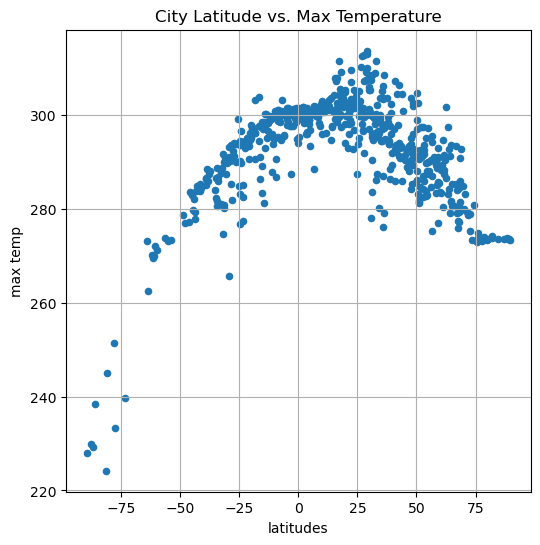

In [25]:
# Build scatter plot for latitude vs. temperature
city_data.plot(kind='scatter',
               x="latitudes",
               y="max temp",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Max Temperature")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

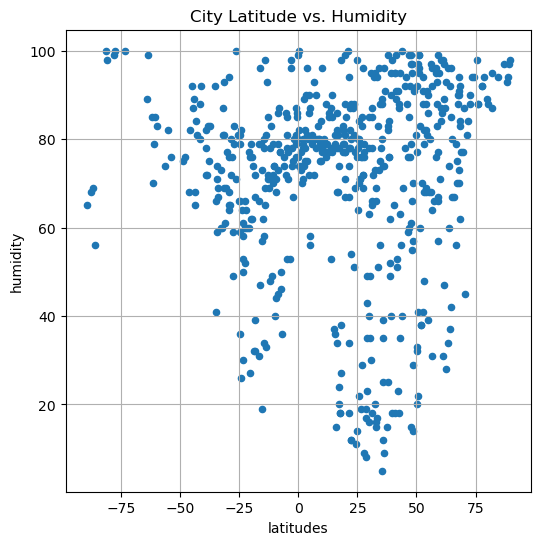

In [26]:
# Build the scatter plots for latitude vs. humidity
city_data.plot(kind='scatter',
               x="latitudes",
               y="humidity",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Humidity")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

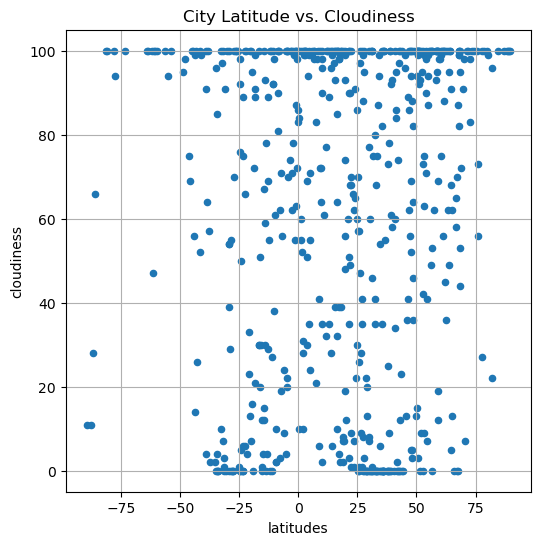

In [28]:
city_data.plot(kind='scatter',
               x="latitudes",
               y="cloudiness",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

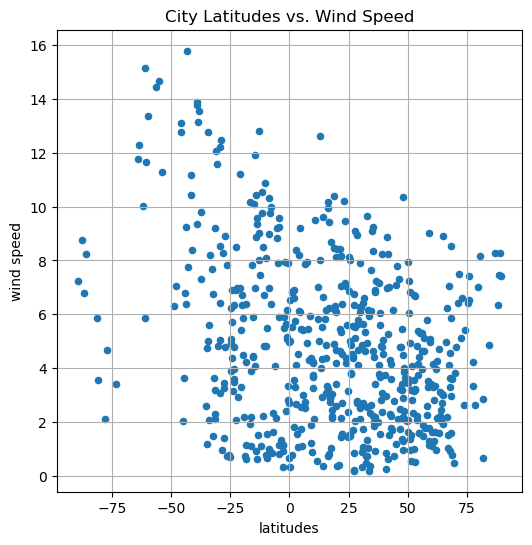

In [29]:
# Build the scatter plots for latitude vs. wind speed
city_data.plot(kind='scatter',
               x="latitudes",
               y="wind speed",
               grid = True,
               figsize =(6,6),
               title = "City Latitudes vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
mt_slope, mt_int,mt_r,mt_p,mt_std_err = linregress(city_data['latitudes'].astype('float'),city_data['max temp'].astype('float'))
hum_slope, hum_int,hum_r,hum_p,hum_std_err = linregress(city_data['latitudes'].astype('float'),city_data['max temp'].astype('float'))
cld_slope, cld_int,cld_r,cld_p,cld_std_err = linregress(city_data['latitudes'].astype('float'),city_data['max temp'].astype('float'))
ws_slope, ws_int,ws_r,ws_p,ws_std_err = linregress(city_data['latitudes'].astype('float'),city_data['max temp'].astype('float'))

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data.loc[(city_data['latitudes']>=0)]

# Display sample data
northern_hemi_df.head()

,cities,latitudes,longitude,max temp,humidity,cloudiness,wind speed,country,time
0,bikenibeu village,3.762169,178.708928,301.48,75,30,4.52,,
1,freetown,1.424566,-23.351073,299.73,70,52,6.85,,
2,bilibino,64.686174,170.035299,293.62,42,91,2.7,RU,1689027969
5,tazacorte,27.352388,-27.092268,296.82,72,8,6.35,,
9,oytal,43.134715,73.210379,292.96,35,0,3.6,KZ,1689027970


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data.loc[(city_data['latitudes']<=0)]

# Display sample data
southern_hemi_df.head()

,cities,latitudes,longitude,max temp,humidity,cloudiness,wind speed,country,time
3,kavieng,-1.126087,153.407895,301,79,87,5.17,,
4,karratha,-18.363769,110.121988,296.08,72,99,6.4,,
6,charqueada,-22.441636,-47.840599,293.05,52,66,2.1,BR,1689027970
7,georgetown,-12.823767,-16.650487,296.61,71,29,8.03,,
8,blackmans bay,-77.422633,147.248709,233.31,100,94,4.66,,


###  Temperature vs. Latitude Linear Regression Plot

The R value is -0.7479444298078585


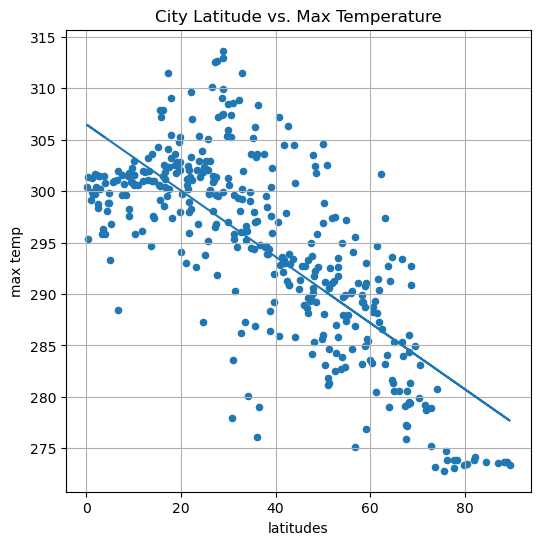

In [55]:
mtn_slope, mtn_int,mtn_r,mtn_p,mtn_std_err = linregress(northern_hemi_df['latitudes'].astype('float'),northern_hemi_df['max temp'].astype('float'))
latitudes = northern_hemi_df.loc[:,'latitudes']
mtn_fit = mtn_slope*latitudes + mtn_int
print(f"The R value is {mtn_r}")
northern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="max temp",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Max Temperature")
plt.plot(latitudes,mtn_fit)
plt.show()

The R value is -0.7479444298078585


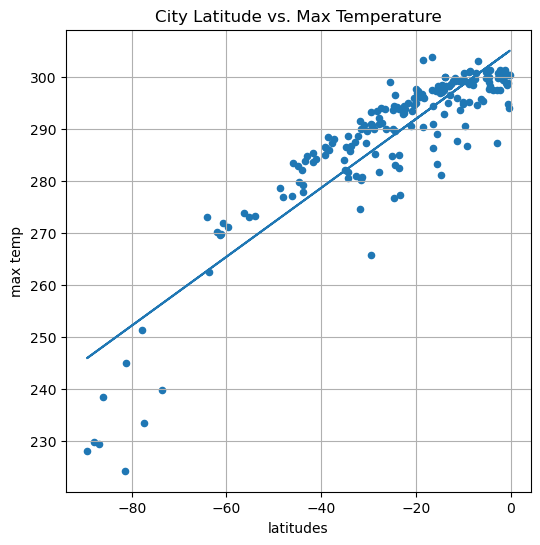

The R value is 0.8950097066637471


In [57]:
mts_slope, mts_int,mts_r,mts_p,mts_std_err = linregress(southern_hemi_df['latitudes'].astype('float'),southern_hemi_df['max temp'].astype('float'))
latitudes = southern_hemi_df.loc[:,'latitudes']
mts_fit = mts_slope*latitudes + mts_int
print(f"The R value is {mtn_r}")
southern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="max temp",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Max Temperature")
plt.plot(latitudes,mts_fit)
plt.show()

print(f"The R value is {mts_r}")

**Discussion about the linear relationship:**


This linear regression seems plausible, it shows a relatively strong negative correlation in the northern hemisphere, implying a higher latitude would indicate a lower temperature. In the southern hemisphere things flipped, the closer the latitude to 0 the higher the maximum temperature. Given the fact that the closer a latitude is to 0 the closer the city is to the equator this makes perfect sense. 

### Humidity vs. Latitude Linear Regression Plot

The R value is 0.12214568375926112


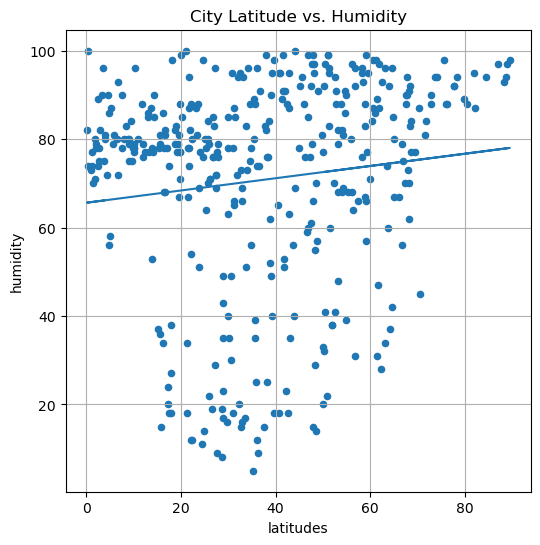

In [62]:
hum_slope, hum_int,hum_r,hum_p,hum_std_err = linregress(northern_hemi_df['latitudes'].astype('float'),northern_hemi_df['humidity'].astype('float'))
latitudes = northern_hemi_df.loc[:,'latitudes']
hum_fit = hum_slope*latitudes + hum_int
print(f"The R value is {hum_r}")
northern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="humidity",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Humidity")
plt.plot(latitudes,hum_fit)
plt.show()

The R value is -0.20197722066759038


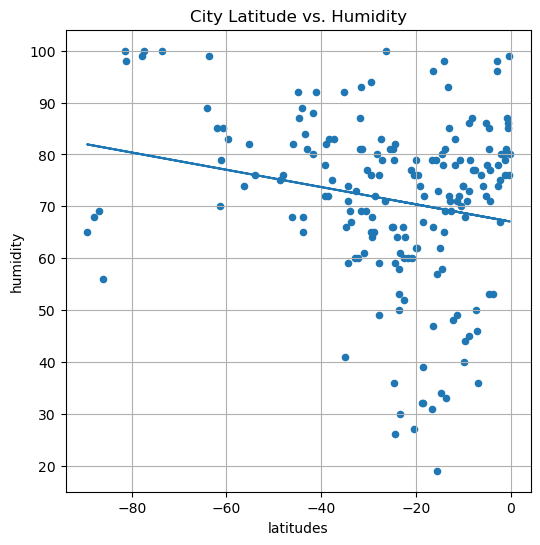

In [63]:
hum_slope, hum_int,hum_r,hum_p,hum_std_err = linregress(southern_hemi_df['latitudes'].astype('float'),southern_hemi_df['humidity'].astype('float'))
latitudes = southern_hemi_df.loc[:,'latitudes']
hum_fit = hum_slope*latitudes + hum_int
print(f"The R value is {hum_r}")
southern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="humidity",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Humidity")
plt.plot(latitudes,hum_fit)
plt.show()

**Discussion about the linear relationship:** This is once again a kind of response we'd expect here, some correlation with the heat and humidity but not nearly as much as the previous graphs showed. These correlations once again show an inverse relationship when comparing the north to the south. 

### Cloudiness vs. Latitude Linear Regression Plot

The R value is 0.12776507039347382


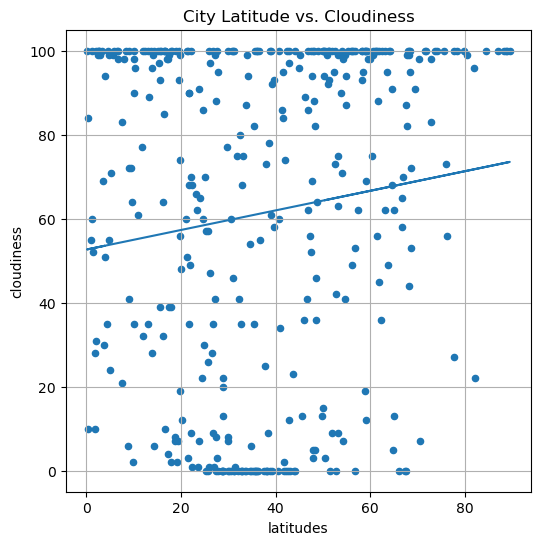

In [66]:
cld_slope, cld_int,cld_r,cld_p,cld_std_err = linregress(northern_hemi_df['latitudes'].astype('float'),northern_hemi_df['cloudiness'].astype('float'))
latitudes = northern_hemi_df.loc[:,'latitudes']
cld_fit = cld_slope*latitudes + cld_int
print(f"The R value is {cld_r}")
northern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="cloudiness",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Cloudiness")
plt.plot(latitudes,cld_fit)
plt.show()

The R value is -0.06886823897925759


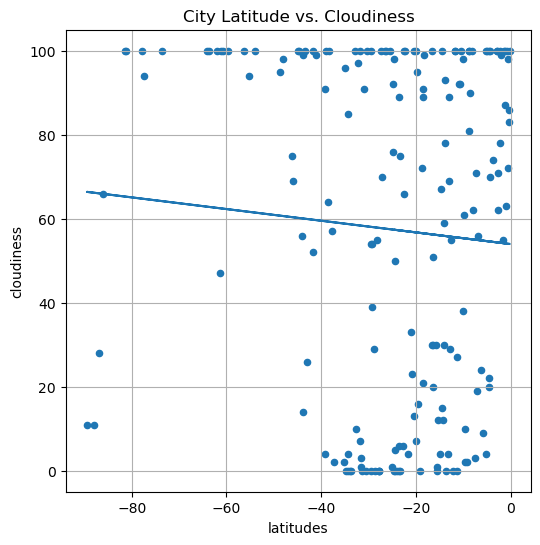

In [67]:
cld_slope, cld_int,cld_r,cld_p,cld_std_err = linregress(southern_hemi_df['latitudes'].astype('float'),southern_hemi_df['cloudiness'].astype('float'))
latitudes = southern_hemi_df.loc[:,'latitudes']
cld_fit = cld_slope*latitudes + cld_int
print(f"The R value is {cld_r}")
southern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="cloudiness",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Cloudiness")
plt.plot(latitudes,cld_fit)
plt.show()

**Discussion about the linear relationship:** 

Interestingly enough latitude didn't necessarily show a strong correlation with cloudiness. A near equator locaiton still indicated it was more likely you'd have less cloudy weather however for both the southern and northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The R value is -0.09666092713356075


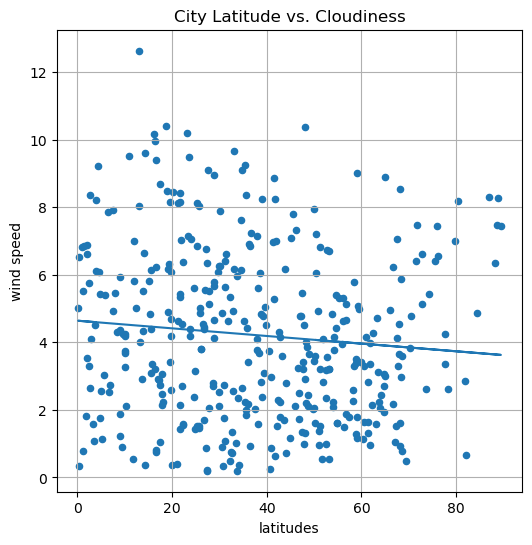

In [69]:
ws_slope, ws_int,ws_r,ws_p,ws_std_err = linregress(northern_hemi_df['latitudes'].astype('float'),northern_hemi_df['wind speed'].astype('float'))
latitudes = northern_hemi_df.loc[:,'latitudes']
ws_fit = ws_slope*latitudes + ws_int
print(f"The R value is {ws_r}")
northern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="wind speed",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Wind Speed")
plt.plot(latitudes,ws_fit)
plt.show()

The R value is -0.305893894276951


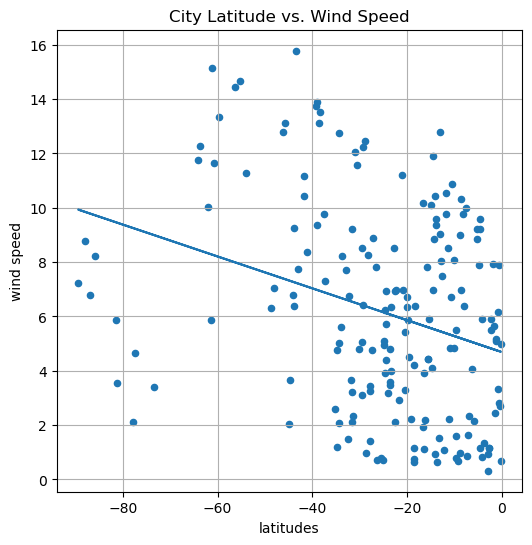

In [70]:
ws_slope, ws_int,ws_r,ws_p,ws_std_err = linregress(southern_hemi_df['latitudes'].astype('float'),southern_hemi_df['wind speed'].astype('float'))
latitudes = southern_hemi_df.loc[:,'latitudes']
ws_fit = ws_slope*latitudes + ws_int
print(f"The R value is {ws_r}")
southern_hemi_df.plot(kind='scatter',
               x="latitudes",
               y="wind speed",
               grid = True,
               figsize =(6,6),
               title = "City Latitude vs. Wind Speed")
plt.plot(latitudes,ws_fit)
plt.show()

**Discussion about the linear relationship:** 

This was the only relationship that showed negative for both positive and negative latitudes. THis indicates that in the southern hemisphere a location close to the equator would indicate low wind speeds while in the northern hemisphere the opposite is true. I would say this has more to do with whether or not the location is by a body of water which is most likely why we see these unexpected outputs.